In [5]:
#Import the requests library
import requests

#Import the API key
from config import weather_api_key

#Import the datetime module from the datetime library
from datetime import datetime

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ff3ead26fa733ab5a792ef6f3221a1ed


In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [10]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

570

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | punta arenas
Processing Record 2 of Set 12 | riyadh
Processing Record 3 of Set 12 | tiksi
Processing Record 4 of Set 12 | linxia
Processing Record 5 of Set 12 | belyy yar
Processing Record 6 of Set 12 | manjacaze
Processing Record 7 of Set 12 | busselton
Processing Record 8 of Set 12 | albany
Processing Record 9 of Set 12 | aklavik
Processing Record 10 of Set 12 | gundorovskiy
Processing Record 11 of Set 12 | ushuaia
Processing Record 12 of Set 12 | anloga
Processing Record 13 of Set 12 | margate
Processing Record 14 of Set 12 | cheyenne
Processing Record 15 of Set 12 | port alfred
Processing Record 16 of Set 12 | vao
Processing Record 17 of Set 12 | bluff
Processing Record 18 of Set 12 | puerto ayora
Processing Record 19 of Set 12 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 12 | avarua
Processing Record 21 of Set 12 | husavik
Processing Record 22 of Set 12 | faanui
Processing Record 23 of Set 12 | mahebourg
Processing Record 

Processing Record 34 of Set 15 | geraldton
Processing Record 35 of Set 15 | ouargaye
Processing Record 36 of Set 15 | bengkulu
Processing Record 37 of Set 15 | uyemskiy
Processing Record 38 of Set 15 | pemangkat
Processing Record 39 of Set 15 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 15 | kovdor
Processing Record 41 of Set 15 | homer
Processing Record 42 of Set 15 | broome
Processing Record 43 of Set 15 | pauini
Processing Record 44 of Set 15 | cherskiy
Processing Record 45 of Set 15 | upernavik
Processing Record 46 of Set 15 | namibe
Processing Record 47 of Set 15 | sechura
Processing Record 48 of Set 15 | hilo
Processing Record 49 of Set 15 | kruisfontein
Processing Record 50 of Set 15 | samusu
City not found. Skipping...
Processing Record 1 of Set 16 | rock springs
Processing Record 2 of Set 16 | russell
Processing Record 3 of Set 16 | bolungarvik
City not found. Skipping...
Processing Record 4 of Set 16 | atasu
Processing Record 5 of Set 16 | qaanaaq
Process

Processing Record 23 of Set 19 | jimo
Processing Record 24 of Set 19 | picton
Processing Record 25 of Set 19 | mareeba
Processing Record 26 of Set 19 | atambua
Processing Record 27 of Set 19 | hermiston
Processing Record 28 of Set 19 | sorland
Processing Record 29 of Set 19 | kachikau
City not found. Skipping...
Processing Record 30 of Set 19 | fort saint john
City not found. Skipping...
Processing Record 31 of Set 19 | vestmannaeyjar
Processing Record 32 of Set 19 | la ronge
Processing Record 33 of Set 19 | vaitape
Processing Record 34 of Set 19 | cururupu
Processing Record 35 of Set 19 | praia
Processing Record 36 of Set 19 | nantucket
Processing Record 37 of Set 19 | darhan
Processing Record 38 of Set 19 | coihaique
Processing Record 39 of Set 19 | roma
Processing Record 40 of Set 19 | pisco
Processing Record 41 of Set 19 | chifeng
Processing Record 42 of Set 19 | bonavista
Processing Record 43 of Set 19 | rabo de peixe
Processing Record 44 of Set 19 | longyearbyen
Processing Record

Processing Record 7 of Set 23 | marzuq
Processing Record 8 of Set 23 | kloulklubed
Processing Record 9 of Set 23 | alta floresta
Processing Record 10 of Set 23 | bosobolo
Processing Record 11 of Set 23 | tommot
Processing Record 12 of Set 23 | ambrolauri
Processing Record 13 of Set 23 | san patricio
Processing Record 14 of Set 23 | takoradi
Processing Record 15 of Set 23 | denpasar
Processing Record 16 of Set 23 | sinkat
City not found. Skipping...
Processing Record 17 of Set 23 | kang
Processing Record 18 of Set 23 | borba
Processing Record 19 of Set 23 | atlantic city
Processing Record 20 of Set 23 | chino
-----------------------------
Data Retrieval Complete      
-----------------------------


In [36]:
len(city_data)

524

In [17]:
#Convert the array of ddictionaries to a Pandas DataFraame 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,44.60,67,4,28.86,CL,2020-12-24 03:56:18
1,Riyadh,24.69,46.72,51.80,62,0,4.23,SA,2020-12-24 03:53:47
2,Tiksi,71.69,128.87,-16.62,89,100,7.07,RU,2020-12-24 03:58:19
3,Linxia,35.60,103.21,24.37,75,88,1.50,CN,2020-12-24 03:58:19
4,Belyy Yar,53.60,91.39,21.20,57,0,10.40,RU,2020-12-24 03:58:19
5,Manjacaze,-24.71,33.88,78.21,91,100,3.60,MZ,2020-12-24 03:58:19
6,Busselton,-33.65,115.33,93.99,21,5,5.99,AU,2020-12-24 03:58:20
7,Albany,42.60,-73.97,37.00,64,94,3.00,US,2020-12-24 03:55:01
8,Aklavik,68.22,-135.01,-2.20,84,100,4.70,CA,2020-12-24 03:58:20
9,Gundorovskiy,46.78,41.90,20.98,86,76,8.10,RU,2020-12-24 03:58:20


In [18]:
new_city_column =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_city_column]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-12-24 03:56:18,-53.15,-70.92,44.60,67,4,28.86
1,Riyadh,SA,2020-12-24 03:53:47,24.69,46.72,51.80,62,0,4.23
2,Tiksi,RU,2020-12-24 03:58:19,71.69,128.87,-16.62,89,100,7.07
3,Linxia,CN,2020-12-24 03:58:19,35.60,103.21,24.37,75,88,1.50
4,Belyy Yar,RU,2020-12-24 03:58:19,53.60,91.39,21.20,57,0,10.40
5,Manjacaze,MZ,2020-12-24 03:58:19,-24.71,33.88,78.21,91,100,3.60
6,Busselton,AU,2020-12-24 03:58:20,-33.65,115.33,93.99,21,5,5.99
7,Albany,US,2020-12-24 03:55:01,42.60,-73.97,37.00,64,94,3.00
8,Aklavik,CA,2020-12-24 03:58:20,68.22,-135.01,-2.20,84,100,4.70
9,Gundorovskiy,RU,2020-12-24 03:58:20,46.78,41.90,20.98,86,76,8.10


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1608782432.9489899

In [22]:
today = time.strftime("%x")
today

'12/23/20'

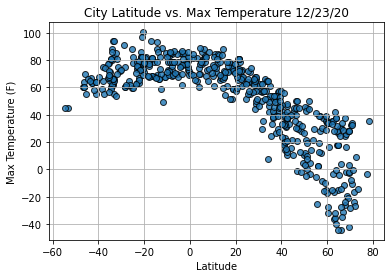

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

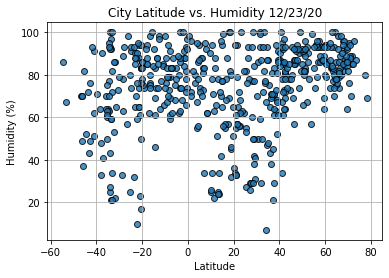

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

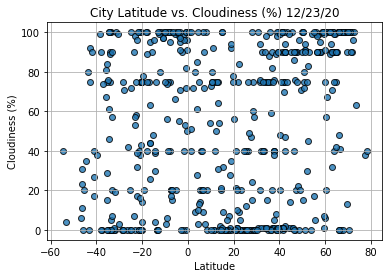

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

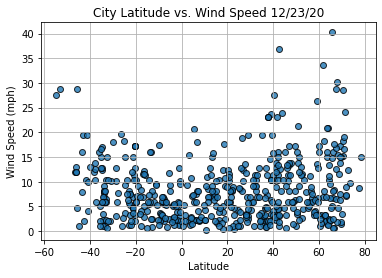

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                     Cheyenne
Country                        US
Date          2020-12-24 03:55:42
Lat                         41.14
Lng                       -104.82
Max Temp                     19.4
Humidity                       34
Cloudiness                      1
Wind Speed                  13.87
Name: 13, dtype: object

In [47]:
#Find cities that are in the nothern hemisphere in a list
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
519    False
520    False
521    False
522     True
523     True
Name: Lat, Length: 524, dtype: bool

In [48]:
#Another way to find cities that are in the northern hemisphere
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Riyadh,SA,2020-12-24 03:53:47,24.69,46.72,51.80,62,0,4.23
2,Tiksi,RU,2020-12-24 03:58:19,71.69,128.87,-16.62,89,100,7.07
3,Linxia,CN,2020-12-24 03:58:19,35.60,103.21,24.37,75,88,1.50
4,Belyy Yar,RU,2020-12-24 03:58:19,53.60,91.39,21.20,57,0,10.40
7,Albany,US,2020-12-24 03:55:01,42.60,-73.97,37.00,64,94,3.00


In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

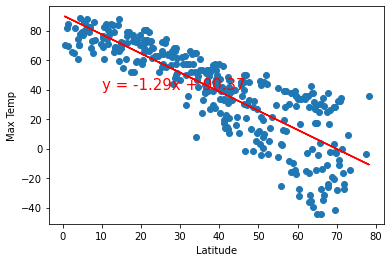

In [50]:
# Linear regression on the Northern Hemisphere-Max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", 'Max Temp',(10,40))

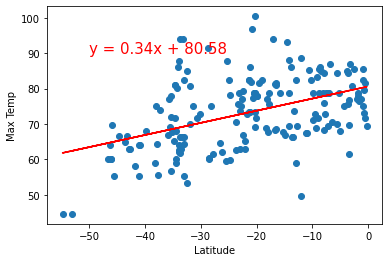

In [51]:
# Linear regression on the Southern Hemisphere-Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

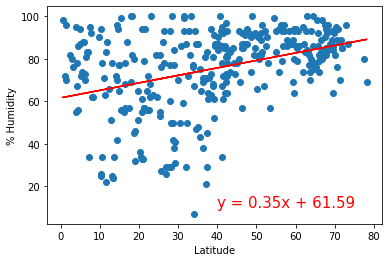

In [52]:
# Linear regression on the Northern Hemisphere-Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

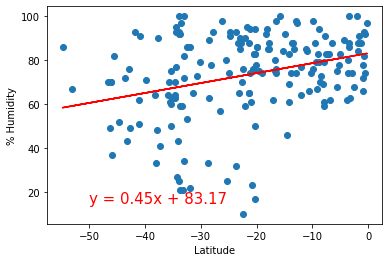

In [53]:
# Linear regression on the Southern Hemisphere- Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

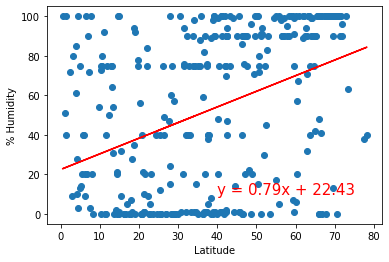

In [54]:
# Linear regression on the Northern Hemisphere-Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Humidity',(40, 10))

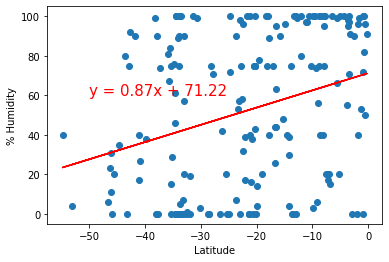

In [55]:
# Linear regression on the Southern Hemisphere- Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,60))

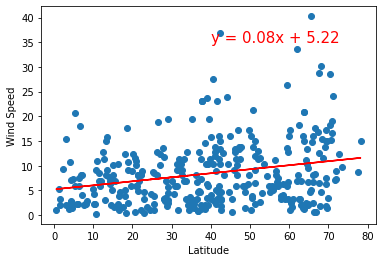

In [57]:
# Linear regression on the Northern Hemisphere-Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

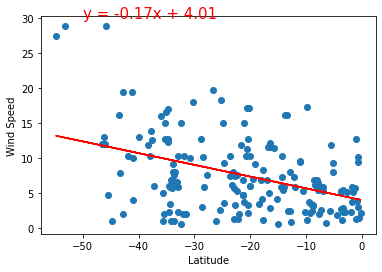

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))
